def UsersNotRecommend( año : int ): Devuelve el top 3 de juegos mas recomendados por usuarios para el año dado. (reviews.recommend = False y comentarios negativos)

In [1]:
import pandas as pd

archivo_csv1 = 'gamescompleto.csv'
archivo_csv2 = 'itemscompleto.csv'
archivo_csv3 = 'df_reviews_completo3sin23.csv'

dfgames = pd.read_csv(archivo_csv1)
dfitems = pd.read_csv(archivo_csv2)
dfreviews = pd.read_csv(archivo_csv3)

In [2]:
dfreviews.head()

,user_id,user_url,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,2011.0,NaN,1250,No ratings yet,True,2
1,js41637,http://steamcommunity.com/id/js41637,NaN,2011.0,NaN,22200,No ratings yet,True,2
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,2011.0,NaN,43110,No ratings yet,True,1
3,doctr,http://steamcommunity.com/id/doctr,NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,NaN,2013.0,NaN,227300,0 of 1 people (0%) found this review helpful,True,1


In [3]:
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59275 entries, 0 to 59274
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             25787 non-null  object 
 1   user_url            25787 non-null  object 
 2   funny               8150 non-null   object 
 3   Fecha_posteo        49159 non-null  float64
 4   last_edited         6140 non-null   object 
 5   item_id             59275 non-null  int64  
 6   helpful             59275 non-null  object 
 7   recommend           59275 non-null  bool   
 8   sentiment_analysis  59275 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 3.7+ MB


In [4]:
dfreviews.isnull().sum()

user_id               33488
user_url              33488
funny                 51125
Fecha_posteo          10116
last_edited           53135
item_id                   0
helpful                   0
recommend                 0
sentiment_analysis        0
dtype: int64

In [5]:
# vamos a limpiar un poco la columna que nos interesa
dfreviews2 = dfreviews.dropna(subset=['Fecha_posteo'])

print(dfreviews2.isnull().sum())

user_id               28803
user_url              28803
funny                 43373
Fecha_posteo              0
last_edited           44022
item_id                   0
helpful                   0
recommend                 0
sentiment_analysis        0
dtype: int64


In [6]:
# de este df necesitariamos solo estas columnas 'item_id','Fecha_posteo','recommend', sentiment_analysis
dfreviews3= dfreviews2[['item_id','Fecha_posteo','recommend','sentiment_analysis']]

In [7]:
dfreviews3.head()

,item_id,Fecha_posteo,recommend,sentiment_analysis
0,1250,2011.0,True,2
1,22200,2011.0,True,2
2,43110,2011.0,True,1
3,251610,2014.0,True,2
4,227300,2013.0,True,1


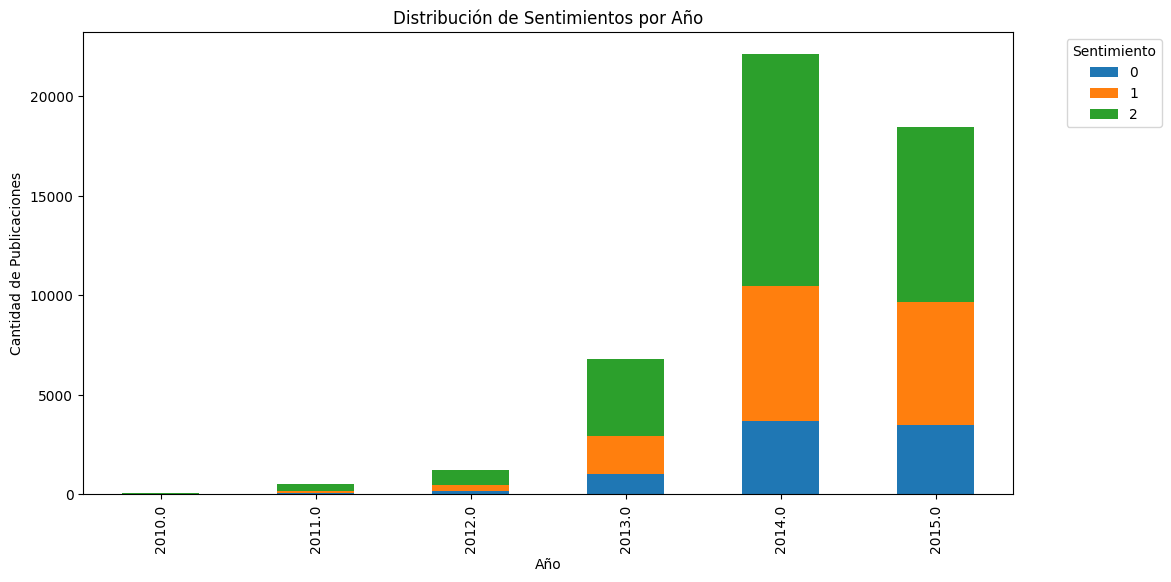

In [9]:
import matplotlib.pyplot as plt

# Agrupamos por año los sentimientos
sentiment_counts = dfreviews3.groupby(['Fecha_posteo', 'sentiment_analysis'])['sentiment_analysis'].count().unstack().fillna(0)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribución de Sentimientos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Publicaciones')
plt.legend(title='Sentimiento', labels=['0', '1', '2'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [10]:
# Veamos un poco el siguiente df
dfitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88310 non-null  object 
 1   items_count       88310 non-null  float64
 2   steam_id          88310 non-null  int64  
 3   user_url          88310 non-null  object 
 4   item_id           88310 non-null  int64  
 5   item_name         88310 non-null  object 
 6   playtime_forever  88310 non-null  int64  
 7   playtime_2weeks   88310 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.4+ MB


In [11]:
dfitems

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,20,Team Fortress Classic,0,0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,30,Day of Defeat,7,0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40,Deathmatch Classic,0,0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...,...
88305,76561198323066619,22.0,76561198323066619,http://steamcommunity.com/profiles/76561198323...,273350,Evolve Stage 2,23,0
88306,76561198326700687,177.0,76561198326700687,http://steamcommunity.com/profiles/76561198326...,10,Counter-Strike,48,0
88307,XxLaughingJackClown77xX,0.0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,80,Counter-Strike: Condition Zero,0,0
88308,76561198329548331,7.0,76561198329548331,http://steamcommunity.com/profiles/76561198329...,100,Counter-Strike: Condition Zero Deleted Scenes,0,0


In [12]:
# separamos la columnas de interes
dfitems2= dfitems[['item_name','item_id']]

In [15]:
dfitems2['item_name'] = dfitems2['item_name'].str.lower()


C:\Users\W10\AppData\Local\Temp\ipykernel_5860\755035641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfitems2['item_name'] = dfitems2['item_name'].str.lower()


In [16]:
dfitems2.head()
# Los nombres no los voy a poner a miniscula porque estan escritos 

,item_name,item_id
0,counter-strike,10
1,team fortress classic,20
2,day of defeat,30
3,deathmatch classic,40
4,half-life: opposing force,50


In [17]:
dfitems2.info()
#no hay nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_name  88310 non-null  object
 1   item_id    88310 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [18]:
# unimos nuestros df por medio de item_id
merged_df = pd.merge(dfreviews3, dfitems2, on='item_id', how='inner')


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9535143 entries, 0 to 9535142
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   item_id             int64  
 1   Fecha_posteo        float64
 2   recommend           bool   
 3   sentiment_analysis  int64  
 4   item_name           object 
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 300.1+ MB


In [20]:
merged_df.head()

,item_id,Fecha_posteo,recommend,sentiment_analysis,item_name
0,1250,2011.0,True,2,killing floor
1,1250,2011.0,True,2,killing floor
2,1250,2011.0,True,2,killing floor
3,1250,2011.0,True,2,killing floor
4,1250,2011.0,True,2,killing floor


In [21]:
# para reducir el df nos quedamos solo con los valor distintos de 0
merged_df = merged_df[merged_df['sentiment_analysis'] != 0]

In [22]:
# y aca nos quedamos solo con los True
merged_df = merged_df[merged_df['recommend'] != False]

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7524317 entries, 0 to 9535142
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   item_id             int64  
 1   Fecha_posteo        float64
 2   recommend           bool   
 3   sentiment_analysis  int64  
 4   item_name           object 
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 294.2+ MB


In [24]:
merged_df.isnull().sum()

item_id               0
Fecha_posteo          0
recommend             0
sentiment_analysis    0
item_name             0
dtype: int64

In [25]:
# veamos lo rangos de fecha
valor_minimo = merged_df['Fecha_posteo'].min()
valor_maximo = merged_df['Fecha_posteo'].max()

print("Valor Mínimo:", valor_minimo)
print("Valor Máximo:", valor_maximo)


Valor Mínimo: 2010.0
Valor Máximo: 2015.0


In [27]:
# convierto a enteros 
merged_df['Fecha_posteo'] = merged_df['Fecha_posteo'].astype(int)


In [28]:
merged_df


,item_id,Fecha_posteo,recommend,sentiment_analysis,item_name
0,1250,2011,True,2,killing floor
1,1250,2011,True,2,killing floor
2,1250,2011,True,2,killing floor
3,1250,2011,True,2,killing floor
4,1250,2011,True,2,killing floor
...,...,...,...,...,...
9535138,306040,2015,True,2,the howler
9535139,306040,2015,True,2,the howler
9535140,306040,2015,True,2,the howler
9535141,306040,2015,True,2,the howler


In [29]:
# Vamos a reducirlo a la mitad por una cuestion de espacio en render 
df_reducido = merged_df.sample(frac=0.5, random_state=1)

In [33]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3762158 entries, 18549 to 7852770
Data columns (total 5 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   item_id             int64 
 1   Fecha_posteo        int32 
 2   recommend           bool  
 3   sentiment_analysis  int64 
 4   item_name           object
dtypes: bool(1), int32(1), int64(2), object(1)
memory usage: 132.8+ MB


In [30]:
archivo_salida = 'df_3reducido.parquet'

df_reducido.to_parquet(archivo_salida, index=False)

In [2]:
import pandas as pd 

In [3]:
archivo_parquet = 'df_3reducido.parquet'

df = pd.read_parquet(archivo_parquet)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762158 entries, 0 to 3762157
Data columns (total 5 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   item_id             int64 
 1   Fecha_posteo        int32 
 2   recommend           bool  
 3   sentiment_analysis  int64 
 4   item_name           object
dtypes: bool(1), int32(1), int64(2), object(1)
memory usage: 104.0+ MB


In [5]:
# Vamos a tener que reducirlo un poco mas aun
tamano_muestra = 0.4  #40% tomamos

# Tomar una muestra aleatoria del DataFrame
df = df.sample(frac=tamano_muestra, random_state=42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504863 entries, 189330 to 3250224
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   item_id             1504863 non-null  int64 
 1   Fecha_posteo        1504863 non-null  int32 
 2   recommend           1504863 non-null  bool  
 3   sentiment_analysis  1504863 non-null  int64 
 4   item_name           1504863 non-null  object
dtypes: bool(1), int32(1), int64(2), object(1)
memory usage: 53.1+ MB


In [7]:
def UsersRecommend(year:int):
    # Filtra el DataFrame para el año especificado y donde 'recommend' es True
    juegos_recomendados = df[(df['Fecha_posteo'] == year) & (df['recommend'] == True)]

    # Verifica si no hay datos para ese año
    if juegos_recomendados.empty:
        return ("No hay datos para ese año", year)

    # Agrupa por el nombre del juego y cuenta las recomendaciones
    juegos_agrupados = juegos_recomendados['item_name'].value_counts().reset_index()
    juegos_agrupados.columns = ['Juego', 'Recomendaciones']

    # Ordena los juegos por número de recomendaciones de mayor a menor
    juegos_ordenados = juegos_agrupados.sort_values(by='Recomendaciones', ascending=False)

    # Toma los 3 juegos con más recomendaciones
    top_3_juegos = juegos_ordenados.head(3)

    # Formatea los resultados en la estructura deseada
    resultado = []
    for i, row in top_3_juegos.iterrows():
        resultado.append({"Puesto " + str(i + 1): row['Juego']})

    return resultado


In [8]:
top_3_juegos = UsersRecommend(2014)
print(top_3_juegos)


[{'Puesto 1': 'counter-strike: global offensive'}, {'Puesto 2': "garry's mod"}, {'Puesto 3': 'unturned'}]


In [9]:
# Lista para almacenar los resultados por año
resultados_por_año = []

# Itera desde el año 2010 hasta el 2015
for año in range(2005, 2023):
    # Llama a la función UsersRecommend para el año actual
    top_3_juegos_año = UsersRecommend(año)

    # Agrega el resultado a la lista de resultados por año
    resultados_por_año.append({str(año): top_3_juegos_año})

# Imprime los resultados
for resultado in resultados_por_año:
    print(resultado)


{'2005': ('No hay datos para ese año', 2005)}
{'2006': ('No hay datos para ese año', 2006)}
{'2007': ('No hay datos para ese año', 2007)}
{'2008': ('No hay datos para ese año', 2008)}
{'2009': ('No hay datos para ese año', 2009)}
{'2010': [{'Puesto 1': "garry's mod"}, {'Puesto 2': 'killing floor'}, {'Puesto 3': 'counter-strike: source'}]}
{'2011': [{'Puesto 1': "garry's mod"}, {'Puesto 2': 'terraria'}, {'Puesto 3': 'portal 2'}]}
{'2012': [{'Puesto 1': "garry's mod"}, {'Puesto 2': 'terraria'}, {'Puesto 3': 'left 4 dead 2'}]}
{'2013': [{'Puesto 1': "garry's mod"}, {'Puesto 2': 'left 4 dead 2'}, {'Puesto 3': 'counter-strike: global offensive'}]}
{'2014': [{'Puesto 1': 'counter-strike: global offensive'}, {'Puesto 2': "garry's mod"}, {'Puesto 3': 'unturned'}]}
{'2015': [{'Puesto 1': 'counter-strike: global offensive'}, {'Puesto 2': "garry's mod"}, {'Puesto 3': 'unturned'}]}
{'2016': ('No hay datos para ese año', 2016)}
{'2017': ('No hay datos para ese año', 2017)}
{'2018': ('No hay datos p